## Project: Sentiment Analysis with Custom Loss Function<br>
#### Part 1. Running EDA to better understand the dataset for modeling <br>


# Imports

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from torch.utils.data import Dataset
from transformers import AutoTokenizer, pipeline

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Read dataset

In [7]:
train_data = load_dataset('imdb', split='train')
test_data = load_dataset('imdb', split='test')

In [8]:
print(train_data[0])

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

### Analyzing labels

In [9]:
train_labels = [train_point['label'] for train_point in train_data]
test_labels = [train_point['label'] for train_point in train_data]

print("size of train dataset is : {}".format(len(train_labels)))
print("percentage of train label 1 is: {}".format(np.mean(train_labels)))

print("size of test dataset is : {}".format(len(test_labels)))
print("percentage of test label 1 is: {}".format(np.mean(test_labels)))

size of train dataset is : 25000
percentage of train label 1 is: 0.5
size of test dataset is : 25000
percentage of test label 1 is: 0.5


## Analyzing texts

In [21]:
train_text = [train_point['text'] for train_point in train_data]
test_text = [train_point['text'] for train_point in test_data]

#### Distribution of word token size

In [22]:
train_text_size = [len(train_text_element) for train_text_element in train_text]
test_text_size = [len(test_text_element) for test_text_element in test_text]

In [23]:
train_text_size[:5]

[1640, 1294, 528, 706, 1814]

In [24]:
test_text_size[:5]

[1386, 1281, 704, 2089, 672]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


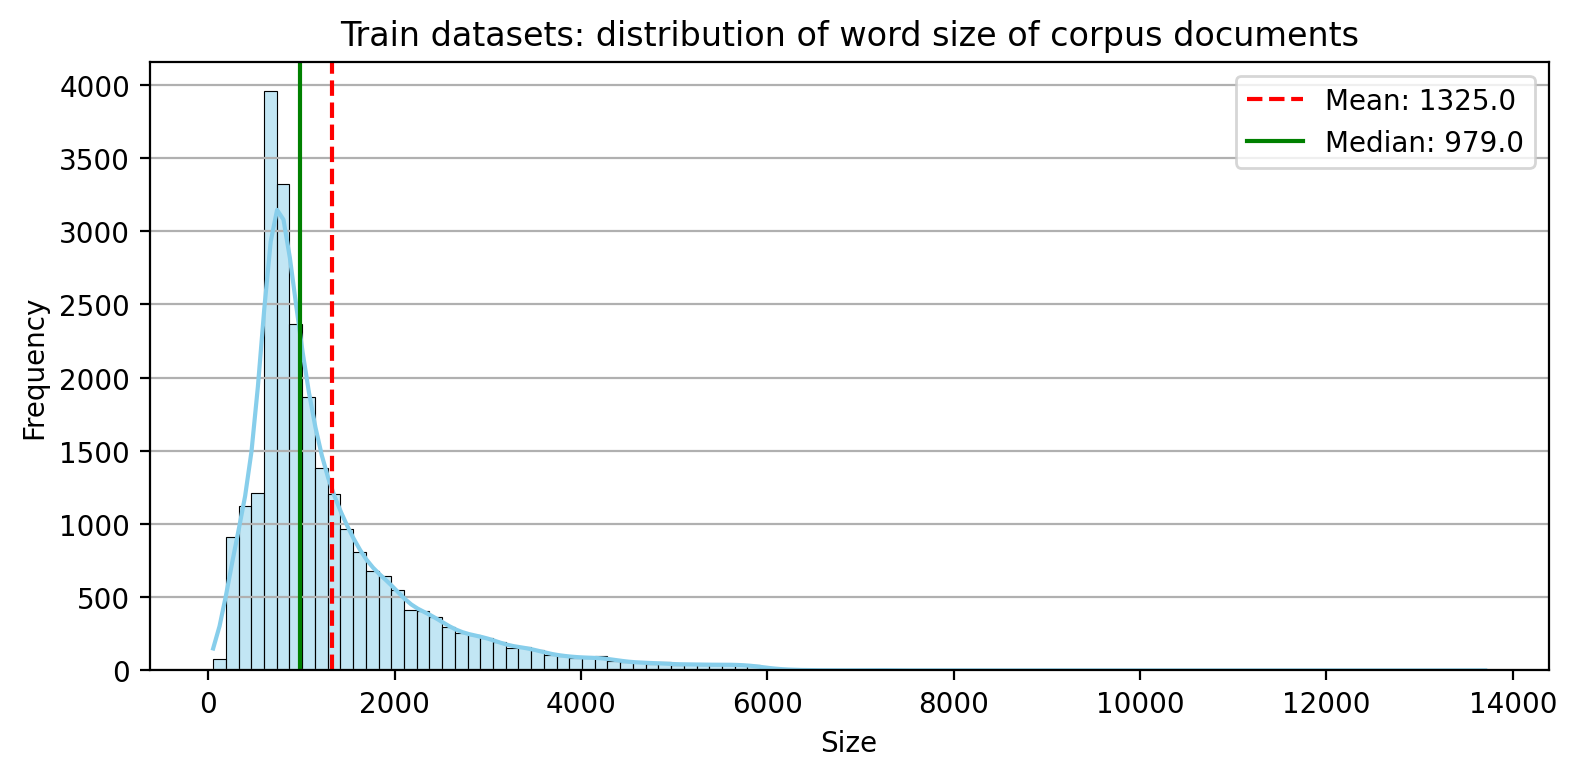

In [25]:
mean_val = np.mean(train_text_size)
median_val = np.median(train_text_size)

plt.figure(figsize=(8, 4))
sns.histplot(train_text_size, kde=True, bins=100, color='skyblue')

plt.axvline(mean_val, color='red', linestyle='--', label="Mean: {}".format(np.round(mean_val)))
plt.axvline(median_val, color='green', linestyle='-', label="Median: {}".format(np.round(median_val)))

plt.title('Train datasets: distribution of word size of corpus documents')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


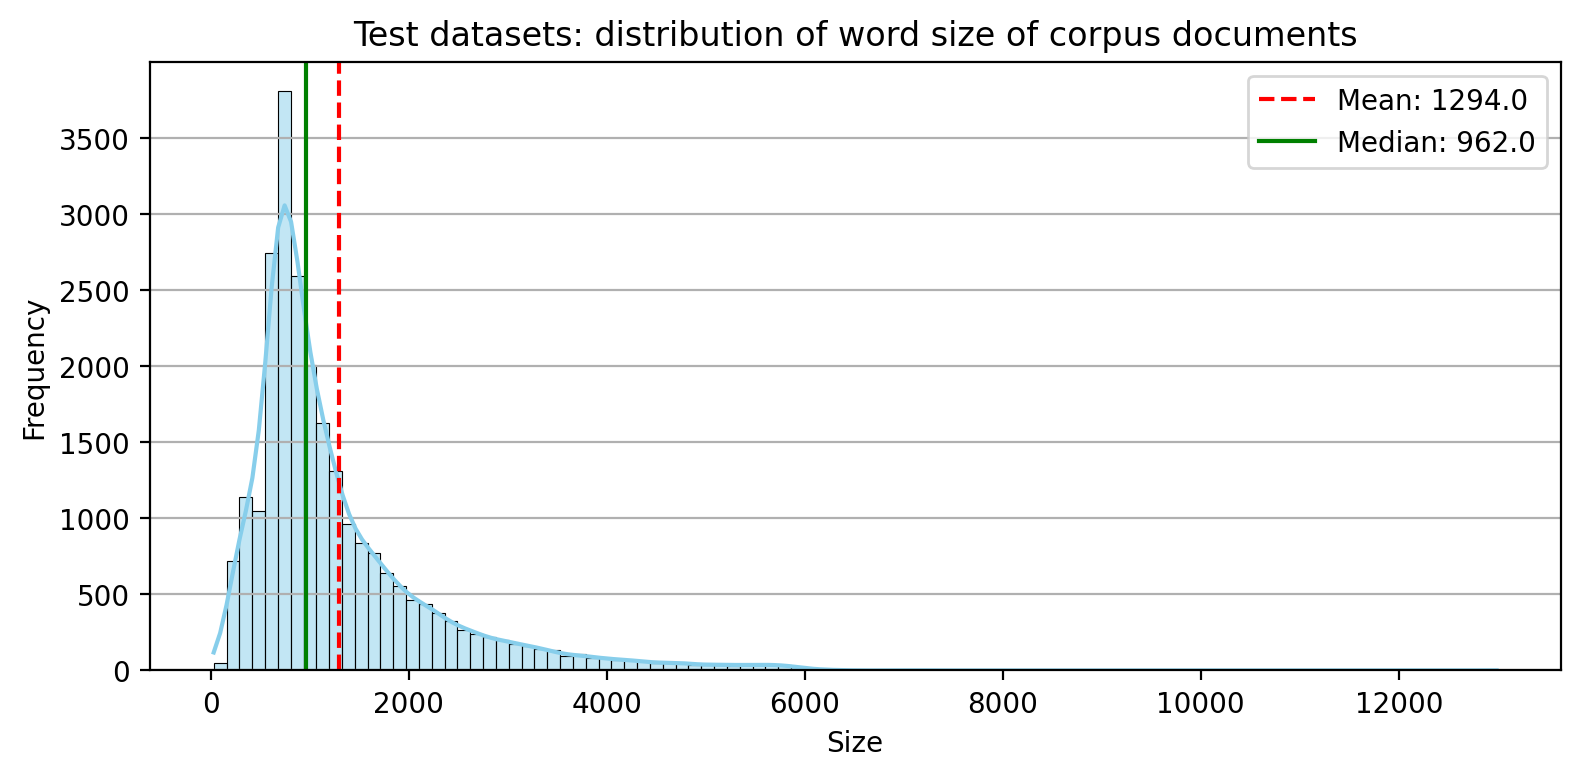

In [26]:
mean_val = np.mean(test_text_size)
median_val = np.median(test_text_size)

plt.figure(figsize=(8, 4))
sns.histplot(test_text_size, kde=True, bins=100, color='skyblue')

plt.axvline(mean_val, color='red', linestyle='--', label="Mean: {}".format(np.round(mean_val)))
plt.axvline(median_val, color='green', linestyle='-', label="Median: {}".format(np.round(median_val)))

plt.title('Test datasets: distribution of word size of corpus documents')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [53]:
short_texts = train_data.filter(lambda x: not x['text'] or len(x['text'].strip()) < 10)
print("Short texts:", len(short_texts))

Short texts: 0


In [54]:
short_texts = test_data.filter(lambda x: not x['text'] or len(x['text'].strip()) < 10)
print("Short texts:", len(short_texts))

Short texts: 0
